# <font color="violet">**Nivel 1**</font>


Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.


In [347]:
#Instalo las conexiones necesarias:

%pip install mysql-connector-python

%pip install pymysql

%pip install sqlalchemy

%pip install cryptography

%pip install statsmodels

%pip install scipy

%pip install pingouin

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [356]:
#Importo las bibliotecas que necesito

from sqlalchemy import create_engine, text
import os
import dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import numpy as np
from datetime import datetime
from scipy import stats
import pingouin as pg


In [245]:
# Configuración de la conexión:
dotenv.load_dotenv(r'C:\Users\pchap\Documents\Datos_conexion _mysql.env')  # ruta y nombre del archivo
usuario = os.getenv('usuario')
password = os.getenv('password') 
host = 'localhost'
basedatos = 'sprint_4'  #Nombre de la base de datos

# Crear la URL de conexión
connection_url = f'mysql+pymysql://{usuario}:{password}@{host}/{basedatos}'
engine = create_engine(connection_url) #el motor de la conexión



In [325]:
#Creo y cargo los data frames

companies = pd.read_sql('select * from companies', engine)
credit_cards = pd.read_sql('select * from credit_cards', engine)
products = pd.read_sql('select * from products', engine)
products_transact = pd.read_sql('select transactions_id, products_id from products_transact', engine) # tengo que seleccionar las dos columnas porque si pongo * lo lee mal, solo coge 587 registros en vez de los 1457.
transactions = pd.read_sql('select * from transactions', engine)
users = pd.read_sql('select * from users', engine)

In [247]:
transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_id,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980


<font color="violet">**- Ejercicio 1**</font>

Gráfico con una variable numérica.

Para este caso, elijo la variable amount de la cual consulto la media, el mínimo y el máximo.


<Axes: >

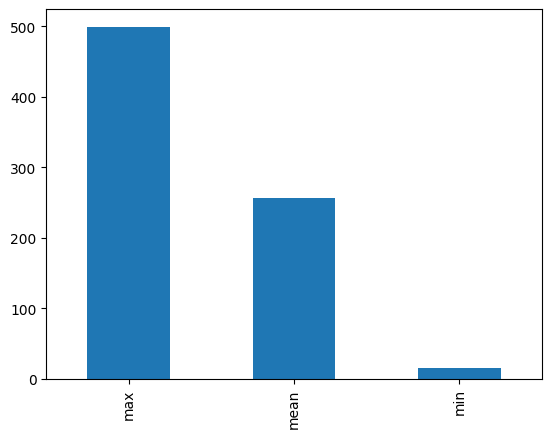

In [248]:
#Máx, min, y media de la columna amount.
transactions.amount.agg(['max','mean','min']).plot.bar()

In [249]:
transactions.amount.agg(['max','mean','min'])

max     499.23000
mean    256.73552
min      15.05000
Name: amount, dtype: float64

<font color="violet">**- Ejercicio 2**</font>

Gráfico con dos variables numéricas.

De la tabla products relaciono precio y peso para ver si hay algo a destacar.

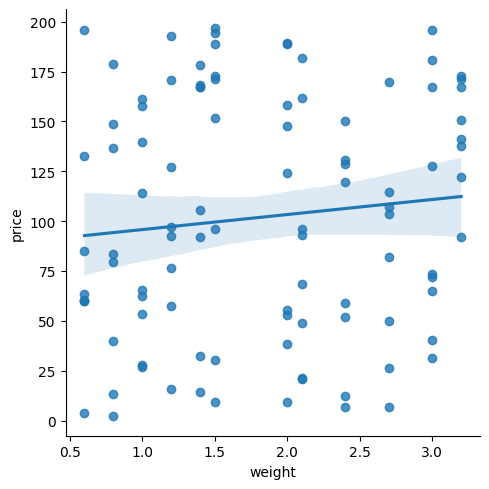

In [250]:
#Precio y peso para ver si hay algo a destacar.
products['price'] = products['price'].replace(r'[\$,]', '', regex=True).astype(float) #Elimina el símbolo $ y las comas si las hay (usando una expresión regular) y convierte el string a float para poder graficar.
sns.lmplot(data = products, x = 'weight' , y = ('price'))

No se ve una relación evidente entre el precio y el peso del producto.

<font color="violet">**- Ejercicio 3**</font>

Gráfico con una variable categórica.

Transacciones declinadas vs no declinadas con etiquetas de sí o no

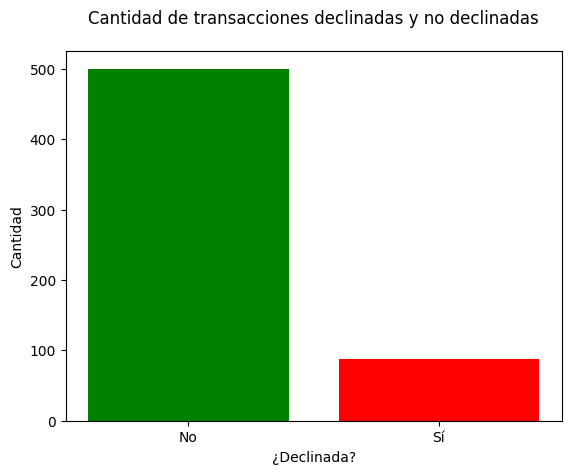

In [251]:
#Transacciones declinadas vs no declinadas con etiquetas de sí o no

columna = transactions['declined'].value_counts() #cuenta cuántas veces aparece cada valor en la columna declined (cuántas veces hay un 0 y cuántas veces hay un 1).

# Defino las etiquetas personalizadas
etiquetas = ['No', 'Sí'] # 0 = No declinada, 1 = Sí declinada

# Valores
valores = [columna.get(0, 0), columna.get(1, 0)] #uso .get(0, 0) y .get(1, 0) para evitar errores si alguno de los valores no existe.

# Creo el gráfico de barras
plt.bar(etiquetas, valores, color = ['green','red'])
plt.bar(etiquetas, valores, color = ['green','red'])
plt.title('Cantidad de transacciones declinadas y no declinadas', pad=20) #Pad deja espacio entre el título y el gráfico
plt.ylabel('Cantidad')
plt.xlabel('¿Declinada?')
plt.show()

Respecto a las transacciones declinadas o no declinadas, vemos que en relación con el total de movimientos, el número de declinadas no es muy elevado.

<font color="violet">**- Ejercicio 4**</font>

Gráfico con una variable categórica y una numérica.

Vamos a ver la media de compra por país y para ello se deben unir dos tablas, la de transactions y la de companies.

In [252]:
#Vemos las 5 primeras filas de transactions
transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_id,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980


In [253]:
#Vemos las 5 primeras filas de companies
companies.head()

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r


In [254]:
#La unión de la tabla se hace por medio de business_id-company_id y vemos cómo queda

transactions_companies=pd.merge(transactions, companies, left_on='business_id', right_on='company_id', how='inner') #inner: use intersection of keys from both frames, similar to a SQL inner join;
transactions_companies.head()

,id,card_id,business_id,timestamp,amount,declined,product_id,user_id,lat,longitude,company_id,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,b-2250,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,b-2618,Non Institute,06 77 15 31 14,amet.metus@protonmail.couk,United Kingdom,https://guardian.co.uk/settings\r
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,b-2346,Ut Semper Foundation,01 60 36 33 06,consectetuer@google.ca,Sweden,https://ebay.com/settings\r


<Axes: xlabel='country'>

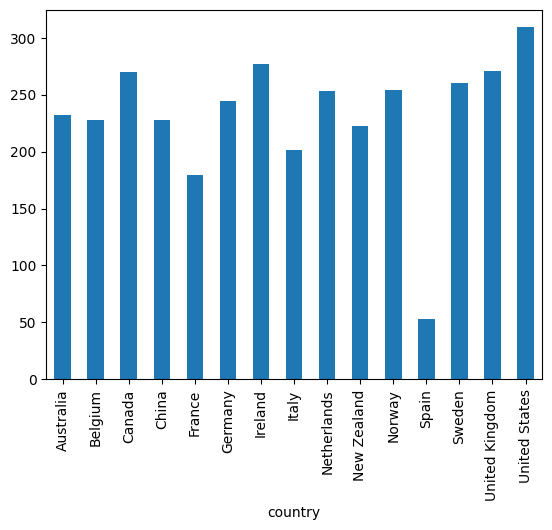

In [255]:
#Para el gráfico uso barras

transactions_companies.groupby('country')['amount'].mean().plot.bar()

En el gráfico podemos ver que los 5 países con media de compra más alta son USA, Irlanda, Canadá, UK y suecia.



<font color="violet">**- Ejercicio 5**</font>

Gráfico con dos variables categóricas 

Vamos a ver las transacciones declinadas y no declinadas realizadas por país.

<Axes: xlabel='country'>

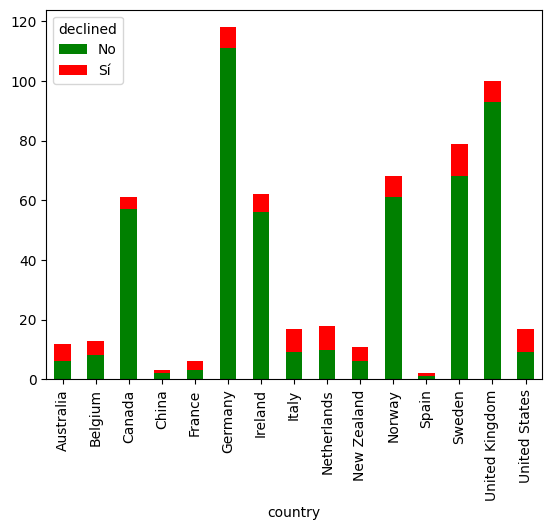

In [256]:
#Para el gráfico voy a usar barras apiladas con pandas

# como quiero cambiar el nombre del valor de declined uso map para cambiar de forma directa los valores de 0 y 1 a 'No' y 'Sí'

transactions_companies['declined'] = transactions_companies['declined'].map({0: 'No', 1: 'Sí'})

pd.crosstab(transactions_companies['country'],transactions_companies['declined']).plot.bar(stacked = True, color = ['green','red'])

<font color="violet">**- Ejercicio 6**</font>

Gráfico con 3 variables 

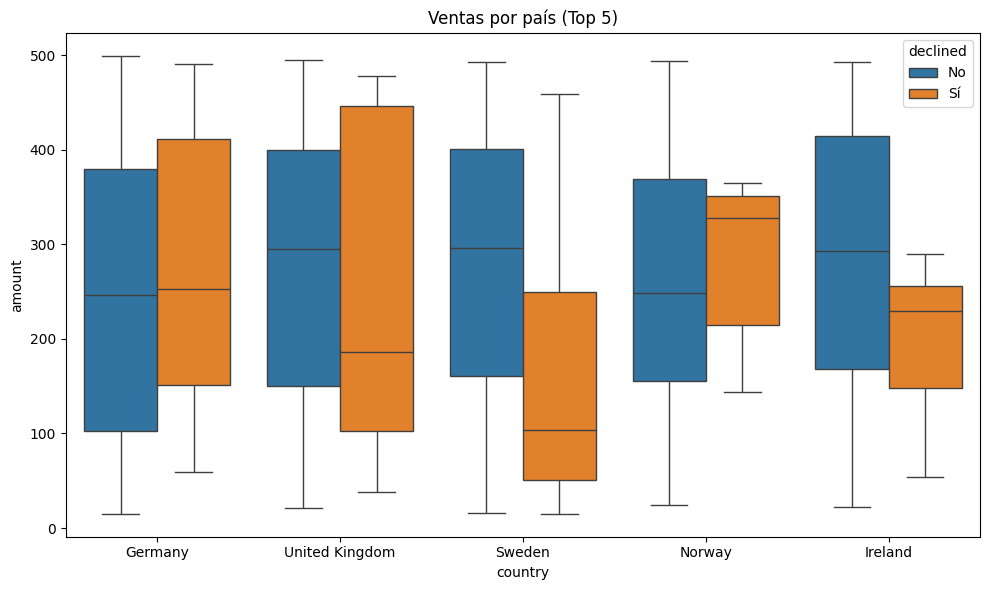

In [ ]:
# Resumo por el top 5 de países con mayor importe total

top_5_countries = (
    transactions_companies.groupby('country')['amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)


#Filtro el DataFrame para incluir solo esos países
transactions_companies_filtered = transactions_companies[transactions_companies['country'].isin(top_5_countries)]


# Grafico el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data= transactions_companies_filtered, x ='country', y ='amount',hue='declined') #como en el ejercicio anterior remapee la columna declined, ahora coge los valores como 0: 'No', 1: 'Sí'

plt.title('Ventas por país (Top 5)')
plt.tight_layout()
plt.show()

En el gráfico podemos observar que la media de ventas es similar en estos países situándose entre 200 -300 €.
El país con más transacciones rechazadas es reino unido.



<font color="violet">**- Ejercicio 7**</font>

Graficar un Pairplot.

Ya que el pairplot es útil para visualizar relaciones entre múltiples variables numéricas y contiene parámetros (ex. hue) para incluir variables categóricas y ver cómo la relación entre variables numéricas varía según la categoría, vamos a ver cómo se comporta la compra según la edad de los compradores. 

In [258]:
#Reviso la tabla users:

users.head()

,id,name,surname,phone,personal_email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Sandy,31564,341-2821 Ultrices Av.


In [259]:
#Para poder calcular la edad de los usuarios primero debo convertir la columna birth_date a fecha para poder operar con los datos

#Cambio el tipo de dato de la columna fecha y lo sobreescribo

users['birth_date'] = pd.to_datetime(users.birth_date)

#Creo una columna que contenga la edad de los usuarios. Resto la fecha actual a la de nacimiento para saber la edad
users['age'] = (datetime.now().year - users['birth_date'].dt.year)

#Cambio el nombre de la columna id por user_id:

users.rename(columns= {'id': 'user_id'}, inplace=True) #nombre antiguo:nombre nuevo

users.head()

,user_id,name,surname,phone,personal_email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,40
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Des Moines,59464,903 Sit Ave,33
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Columbus,56518,736-2063 Tellus St.,27
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Kailua,77417,Ap #545-2244 Erat. Rd.,36
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Sandy,31564,341-2821 Ultrices Av.,27


In [260]:
#modifico el nombre de la columna id de transactions:
transactions.rename(columns= {'id': 'transactions_id'}, inplace=True)
transactions.head()

,transactions_id,card_id,business_id,timestamp,amount,declined,product_id,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980


In [261]:
#Uno la tabla transactions con la de users pero solo con las columnas que me interesan y hago un nuevo data frame:

transactions['declined'] = transactions_companies['declined'].map({'No': 0 , 'Sí': 1})

T_transact = transactions[['transactions_id','user_id','amount','declined']]
U_users = users[['user_id','age','country']]

datos_pairplot = pd.merge(T_transact, U_users, on='user_id', how='inner')

datos_pairplot.head()

,transactions_id,user_id,amount,declined,age,country
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,92,466.92,0,41,United States
1,0466A42E-47CF-8D24-FD01-C0B689713128,170,49.53,0,38,United Kingdom
2,063FBA79-99EC-66FB-29F7-25726D1764A5,275,92.61,0,43,Canada
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,265,394.18,0,26,Canada
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,92,279.93,0,41,United States


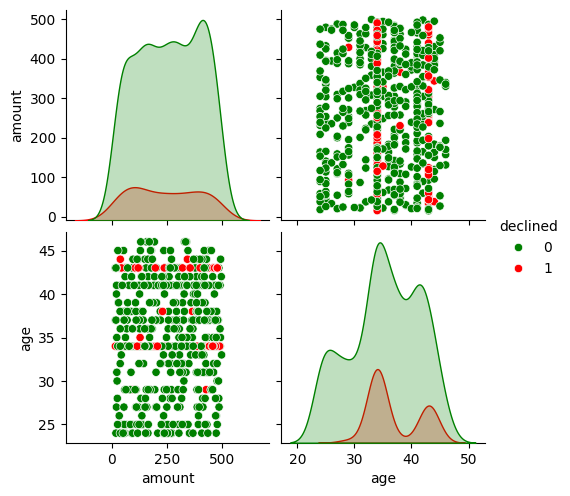

In [262]:
#creo el pairplot
sns.pairplot(datos_pairplot, vars= ['amount','age'], hue='declined', palette=['green', 'red']);
              

El grupo de edad entre los 34-36 son los que más concentran operaciones rechazadas

# <font color="violet">**Nivel 2**</font>


<font color="violet">**- Ejercicio 1**</font>

Correlación de todas las variables numéricas.

Para este análisis usaré las variables amount, weight y productos por transacción.

*El primer paso es trabajar los datos y agruparlos para crear el data frame que necesito*

In [326]:
# Convierto la columna 'products_id' de str a int porque me da error al operar (este cambio ya lo hice en el sprint de power bi porque me daba el mismo error)
products_transact['products_id'] = products_transact['products_id'].astype(int)
products_transact


,transactions_id,products_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1
2,1EA2B262-D507-AD14-4374-4D532967113F,1
3,23CF8ED3-402C-7C54-59CD-DB505C5CCCCE,1
4,2A5A3001-104F-1D1F-7852-5BA801869B6F,1
...,...,...
1452,A84B14A2-2964-EFDE-A234-52B8BCAD87B7,97
1453,CEBC8755-77B1-722D-A899-E86B58B837BC,97
1454,D662DF87-90B7-8C73-CD48-FA68399392C9,97
1455,E6E14C3A-1AE7-7B62-57D8-16A6F19C995F,97


In [327]:
#calculo el total de productos de cada transacción:
total_products = products_transact.groupby('transactions_id', as_index= False).count()
total_products.rename(columns={'products_id':'products_per_transact'},inplace=True)
total_products

,transactions_id,products_per_transact
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2
...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,4
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,4
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,1
585,FE809ED4-2DB6-55AC-C915-929516E4646B,2


In [265]:
#reviso la tabla products para tener una guía:
products.head()

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7


In [329]:
# Convierto la columna 'id' de str a int porque me da error al operar (este cambio ya lo hice en el sprint de power bi porque me daba el mismo error)
products['id'] = products['id'].astype(int)
products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,$119.52,#f4f4f4,2.4,WH--5
2,100,south duel,$40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,$49.70,#141414,2.7,WH--6
4,12,duel Direwolf,$181.60,#a8a8a8,2.1,WH--7
...,...,...,...,...,...,...
95,95,riverlands north Direwolf,$6.90,#c1c1c1,2.7,WH--90
96,96,dooku solo,$20.92,#282828,2.1,WH--91
97,97,jinn Winterfell,$65.25,#bababa,1.0,WH--92
98,98,Direwolf Littlefinger,$38.33,#bababa,2.0,WH--93


In [330]:
#Hago un merge con la tabla products para obtener el peso

P_products = products[['id','weight']]
products_transact = pd.merge(products_transact,P_products, left_on='products_id', right_on='id',how='inner')
products_transact

,transactions_id,products_id,id,weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,1,1.0
1,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1,1,1.0
2,1EA2B262-D507-AD14-4374-4D532967113F,1,1,1.0
3,23CF8ED3-402C-7C54-59CD-DB505C5CCCCE,1,1,1.0
4,2A5A3001-104F-1D1F-7852-5BA801869B6F,1,1,1.0
...,...,...,...,...
1452,A84B14A2-2964-EFDE-A234-52B8BCAD87B7,97,97,1.0
1453,CEBC8755-77B1-722D-A899-E86B58B837BC,97,97,1.0
1454,D662DF87-90B7-8C73-CD48-FA68399392C9,97,97,1.0
1455,E6E14C3A-1AE7-7B62-57D8-16A6F19C995F,97,97,1.0


In [332]:
#calculo el peso total de cada transacción y lo guardo en una variable

peso_total = products_transact[['transactions_id','weight']]
total_weight= peso_total.groupby('transactions_id', as_index=False).sum().round(2)
total_weight.rename(columns={'weight':'total_weight'}, inplace=True)
total_weight


,transactions_id,total_weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,1.2
...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,9.7
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,5.5
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,1.0
585,FE809ED4-2DB6-55AC-C915-929516E4646B,3.3


In [333]:
#Dataframe con peso total y productos totales por transacción:

products_transact_total = pd.merge(total_products,total_weight, on='transactions_id',how='inner')
products_transact_total

,transactions_id,products_per_transact,total_weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,1.2
...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,4,9.7
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,4,5.5
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,1,1.0
585,FE809ED4-2DB6-55AC-C915-929516E4646B,2,3.3


In [335]:
#Creo el dataframe con los datos que usaré para la correlación:

datos_correlacion = pd.merge(datos_pairplot,products_transact_total, on='transactions_id', how='inner')
datos_correlacion.head()

,transactions_id,user_id,amount,declined,age,country,products_per_transact,total_weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,92,466.92,0,41,United States,3,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,170,49.53,0,38,United Kingdom,3,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,275,92.61,0,43,Canada,4,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,265,394.18,0,26,Canada,3,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,92,279.93,0,41,United States,2,1.2


In [372]:
#Hago un test de shapiro wilk para ver si los datos son normales.

test_shapiro =  datos_correlacion[['amount','products_per_transact','total_weight']]

for col in test_shapiro.columns:
    stat, p = stats.shapiro(test_shapiro[col])
    print(f'{col}:, Estadístico de Shapiro-Wilk: {stat:.4f}, p-valor: {p:.4f}')
    if p < 0.05:
        print('Los datos no siguen una distribución normal (p < 0.05).')
    else:
        print('Los datos podrían seguir una distribución normal (p ≥ 0.05).')
    print()


amount:, Estadístico de Shapiro-Wilk: 0.9459, p-valor: 0.0000
Los datos no siguen una distribución normal (p < 0.05).

products_per_transact:, Estadístico de Shapiro-Wilk: 0.8793, p-valor: 0.0000
Los datos no siguen una distribución normal (p < 0.05).

total_weight:, Estadístico de Shapiro-Wilk: 0.9790, p-valor: 0.0000
Los datos no siguen una distribución normal (p < 0.05).



In [376]:
#como los datos no siguen una distribución normal, uso el coeficiente de spearman
correlacion_spearman = datos_correlacion[['amount','products_per_transact','total_weight']].corr(method= 'spearman')
correlacion_spearman

,amount,products_per_transact,total_weight
amount,1.000000,0.012037,-0.005224
products_per_transact,0.012037,1.000000,0.761510
total_weight,-0.005224,0.761510,1.000000


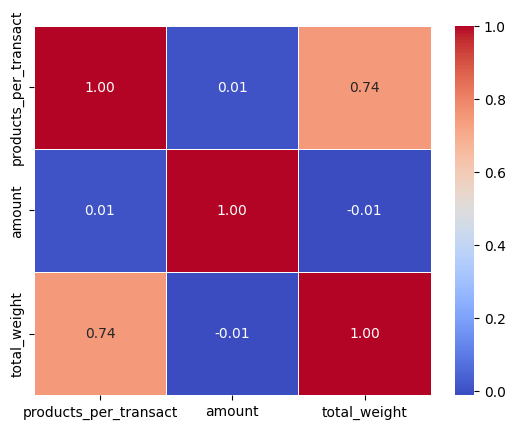

In [378]:
#Grafico la correlación de las variables numéricas con un heatmap
sns.heatmap(datos_correlacion[['products_per_transact','amount','total_weight']].corr(),annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5);

Como conclusión, vemos que la relación más significativa es la que se da entre el número de productos adquirido vs el peso total del pedido, lo cual es algo que tiene sentido.

Por el contrario, vemos que la relación entre importe y peso no es significativa. Esto puede ser porque el producto más caro no necesariamente es el que pesa más.

<font color="violet">**- Ejercicio 2**</font>

Implementa un jointplot.

En línea con la pregunta anterior, uso los datos de la correlación entre peso total y productos por transacción para graficar el jointplot

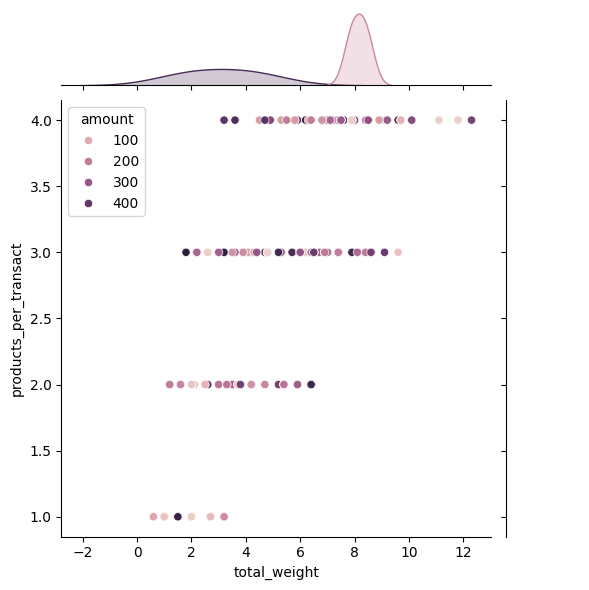

In [388]:
#joinplot: visualización que permite observar simultáneamente la distribución de dos variables y su relación conjunta.
sns.jointplot(datos_correlacion, x='total_weight', y='products_per_transact', hue='amount')
plt.show()

# <font color="violet">**Nivel 3**</font>

<font color="violet">**- Ejercicio 1**</font>

Implementa un violinplot combinado con otro tipo de gráfico.

Uso los datos del ejercicio 1.6 con el top 5 de paises para hacer un violinplot combinado

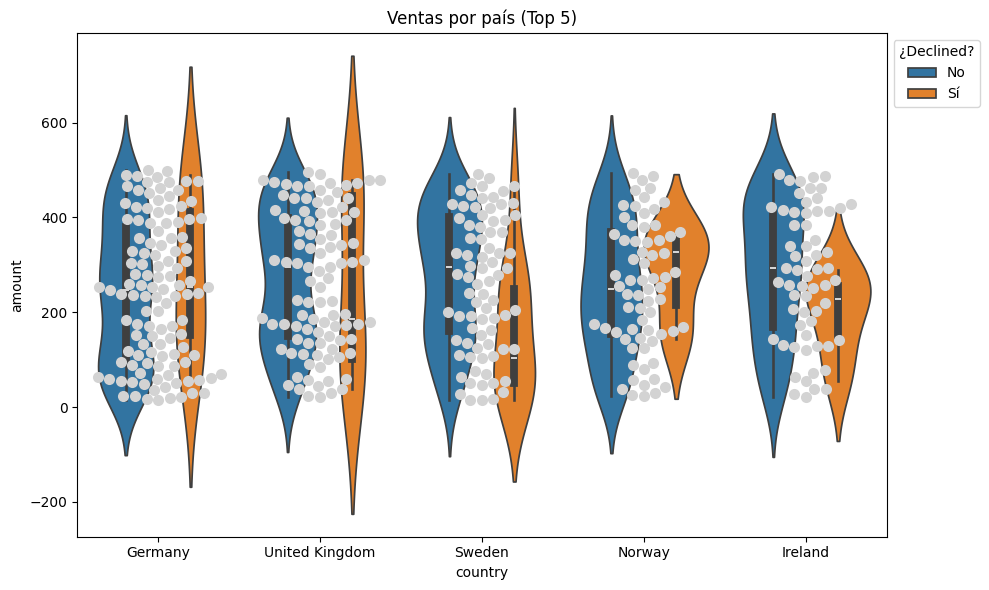

In [404]:
# Grafico el violinplot

plt.figure(figsize=(10, 6))
sns.violinplot(data= transactions_companies_filtered, x ='country', y ='amount',hue='declined') 
sns.swarmplot(data=transactions_companies_filtered,x ='country', y ='amount', color= 'lightgrey', size= 8 )

plt.title('Ventas por país (Top 5)')
plt.legend(title='¿Declined?',bbox_to_anchor=(1, 1), loc='upper left',)
plt.tight_layout()
plt.show()

En la imagen podemos ver que a priori tanto las transacciones declinadas como no declinadas tienen distribuciones similares en cuanto al importe. Así que el importe no necesariamente predice el rechazo de la operación.



<font color="violet">**- Ejercicio 2**</font>

Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente. 

Facetgrid ayuda a visualizar la distribución de una variable así como la relación entre múltiples variables por separado dentro de subconjuntos de su conjunto de datos usando múltiples paneles.

In [409]:
datos_correlacion

,transactions_id,user_id,amount,declined,age,country,products_per_transact,total_weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,92,466.92,0,41,United States,3,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,170,49.53,0,38,United Kingdom,3,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,275,92.61,0,43,Canada,4,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,265,394.18,0,26,Canada,3,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,92,279.93,0,41,United States,2,1.2
...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,272,78.29,0,34,Canada,4,9.7
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,250,200.72,0,31,Canada,4,5.5
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,223,42.32,0,33,Canada,1,1.0
585,FE809ED4-2DB6-55AC-C915-929516E4646B,185,219.83,0,32,United Kingdom,2,3.3


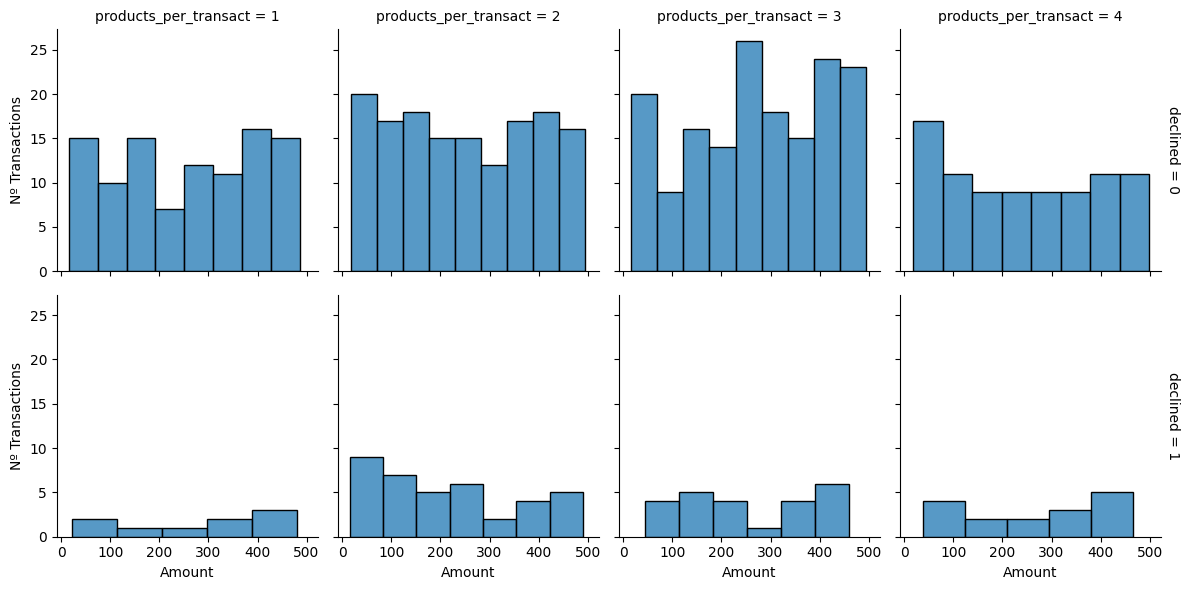

In [412]:
facetgrid = sns.FacetGrid(datos_correlacion, col='products_per_transact', row= 'declined', margin_titles=True)
facetgrid.map_dataframe(sns.histplot, 'amount')
facetgrid.set_axis_labels('Amount','Nº Transactions');


Las transacciones que tienen dos o tres productos adquiridos son aquellas que concentran el mayor volumen de movimientos.
Respecto a las transacciones declinadas o no declinadas, vemos que en relación con el total de movimientos, el número de declinadas no es muy elevado.